In [48]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score, fbeta_score, brier_score_loss, recall_score
import pickle as pkl
import warnings

In [49]:
warnings.filterwarnings('ignore')

In [50]:
def avgKS(df1, df2):
  ksstats = []
  cols = (df1.columns)
  for col in cols:
    cdf1 = (df1[col].sort_values().cumsum())/(len(df1))
    cdf2 = (df2[col].sort_values().cumsum())/(len(df2))
    ksstats.append(np.max(np.abs(cdf1 - cdf2)))
  return np.average(ksstats)

In [51]:
df1 = pd.read_csv('../Data/Edited_bitsM.csv')
df2 = pd.read_csv('../Data/ESIdf.csv')

In [52]:
#using only 300 negatives, fill with that average
df1 = df1[df1['Result'] != 'Positive']
df2

,Unnamed: 0,Gender,Age,Haemoglobin(gms%),Total WBC Count(/Cumm),Neutrophils(%),Lymphocytes(%),Eosinophils(%),Monocytes(%),Basophils(%),Others,Total RBC Count(millions/Cu),HCT(%),MCV(f L),MCH(pg),MCHC(gms%),RDWCV(%),Platelet Count(Lakh / Cumm),Result
0,0,Male,15.0,15.6,7120,49,43,1,4,0,0,5.3,46.1,85.8,29.1,33.8,12.9,2.4,Positive
1,1,Male,20.0,14.7,14150,58,34,0,5,0,0,5.2,41.5,78.7,27.9,35.4,13.7,3.7,Positive
2,2,Female,21.0,11.4,11630,79,15,0,5,0,0,4.4,34.5,77.2,25.5,33.0,17.3,2.6,Positive
3,3,Male,23.0,9.9,10050,82,12,1,3,0,0,4.8,29.7,61.0,20.3,33.3,16.2,2.5,Positive
4,4,Male,24.0,15.9,4800,30,58,0,10,0,0,5.4,45.3,83.6,29.3,35.1,12.7,1.6,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,Male,71.0,14.0,9100,91,6,0,1,0,0,5.2,39.3,75.0,26.7,35.6,15.6,1.7,Positive
71,71,Female,72.0,10.2,11880,81,13,0,3,0,0,3.4,29.7,85.3,29.3,34.3,12.1,6.0,Positive
72,72,Male,73.0,12.4,21110,91,6,0,1,0,0,4.2,35.8,84.8,29.4,34.6,14.6,2.4,Positive
73,73,Female,75.0,11.3,8400,63,31,2,3,0,0,3.9,34.0,87.0,28.9,33.2,13.6,3.8,Positive


In [53]:
# df = pd.read_csv('../../Excels/AllDummy.csv')
df = pd.concat([df1, df2], join = 'inner')

In [54]:
df = df.drop(columns = [df.columns[0], 'Others'])
encoder = LabelEncoder()
df['Result'] = encoder.fit_transform(df['Result'])  
df['Gender'] = encoder.fit_transform(df['Gender'])

In [55]:
#Load data
dfItaly = pd.read_csv('../Data/Dataset-2a.csv')

In [56]:
# dfItaly
dfItaly[dfItaly['CoV-2'] == 1]

,Sex,Age,Calcium,Creatine_kinase,Creatinine,Alkaline_phosphatase,Gamma_glutamyltransferase,Glucose,Aspartate_aminotransferase,Alanine_aminotransferase,...,Monocytes_(%),Eosinophils_(%),Basophils_(%),Neutrophils_(10^9/L),Lymphocytes_(10^9/L),Monocytes_(10^9/L),Eosinophils_(10^9/L),Basophils_(10^9/L),Covid-specific_symptoms,CoV-2
1,1.0,-0.573893,-0.450493,0.120314,-0.207346,-0.462651,0.206037,-0.375195,0.508158,1.066960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
5,1.0,1.232644,-0.276740,-0.188913,0.101021,-0.179285,0.044496,-0.419707,-0.132341,-0.324448,...,-0.265952,0.134473,0.960571,-0.815753,-0.805523,-0.688241,-0.117559,-0.410345,0.0,1
6,1.0,0.958926,NaN,NaN,-0.040041,-0.179285,-0.341796,0.426035,-0.256617,-0.446501,...,0.300710,-0.359497,-0.514730,0.212019,-0.805523,0.328684,-0.464502,-0.410345,1.0,1
8,0.0,0.302004,-0.431187,NaN,-0.561640,-0.557107,-0.320726,-0.232754,0.125771,-0.324448,...,-0.755342,-0.544736,-1.252380,-0.681696,-0.700505,-0.780688,-0.464502,-0.410345,1.0,1
9,0.0,0.356747,0.090071,NaN,-0.571482,-0.233259,-0.348820,-0.535441,-0.447810,-0.495323,...,0.429497,-0.544736,-0.145905,-0.838096,-0.595487,-0.410897,-0.464502,-0.410345,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,0.0,0.247260,-0.111289,NaN,-0.620689,NaN,-0.102997,NaN,-0.476489,-0.458707,...,1.498427,1.585511,0.591746,-0.922999,-0.343443,-0.115065,0.506939,0.093840,0.0,1
1380,0.0,1.013670,-0.120923,NaN,-0.620689,NaN,NaN,-0.496269,-0.482225,-0.304920,...,-0.403325,-0.349206,-0.268847,0.086899,0.006618,-0.170533,-0.302595,0.093840,1.0,1
1382,1.0,-0.190688,-0.368186,-0.280161,-0.436981,-0.624575,-0.341796,-0.333649,-0.505168,-0.129163,...,1.021916,0.299130,-0.883555,-1.019818,-0.262929,-0.392408,-0.117559,-0.326314,1.0,1
1384,1.0,0.794696,NaN,NaN,NaN,-0.165791,-0.327749,NaN,-0.409572,-0.446501,...,-0.162923,0.813682,-0.514730,-0.514124,-0.280432,-0.373918,0.437550,-0.158252,0.0,1


In [57]:
dfItaly.drop(columns = ['Sex', 'Age', 'Calcium', 'Creatine_kinase', 
                        'Creatinine', 'Alkaline_phosphatase','Gamma_glutamyltransferase', 'Glucose',
                            	'Aspartate_aminotransferase', 'Alanine_aminotransferase', 'Lactate_dehydrogenase',
                        'Urea', 'Covid-specific_symptoms', 'Erythrocytes_(10^12/L)', 'Neutrophils_(10^9/L)',
                        'Lymphocytes_(10^9/L)',	'Monocytes_(10^9/L)',	
                        'Eosinophils_(10^9/L)',	'Basophils_(10^9/L)'], inplace=True)

In [58]:
# #Preprocessing

dfItaly.rename(columns = {'CoV-2' : 'Result', 'Leukocytes_(10^9/L)' : 'Total WBC Count(/Cumm)', 
                          'Platelets_(10^9/L)' : 'Platelet Count(Lakh / Cumm)', 'MCHC' : 'MCHC(gms%)',
                          'Hemoglobin' : 'Haemoglobin(gms%)', 'MCV' : 'MCV(f L)',
                          'Eosinophils_(%)' : 'Eosinophils(%)', 'Lymphocytes_(%)' : 'Lymphocytes(%)',
                          'Neutrophils_(%)' : 'Neutrophils(%)',
                          'Basophils_(%)' : 'Basophils(%)', 'Hematocrit' : 'HCT(%)', 'MCH' : 'MCH(pg)',
                          'Monocytes_(%)' : 'Monocytes(%)'}, inplace=True)

In [59]:
dfItaly

,Total WBC Count(/Cumm),Haemoglobin(gms%),HCT(%),MCV(f L),MCH(pg),MCHC(gms%),Platelet Count(Lakh / Cumm),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),Basophils(%),Result
0,0.276856,0.034744,-0.143897,1.950285,2.031963,0.720550,-0.357794,0.102102,-0.470825,0.429497,1.245906,0.591746,0
1,0.129722,0.838773,0.601112,-0.770177,-0.243222,1.055218,1.068793,NaN,NaN,NaN,NaN,NaN,1
2,-0.395755,0.424576,0.361645,-0.438237,-0.224572,0.385882,-0.363020,0.660377,-0.670739,-0.137165,-0.359497,-0.883555,0
3,0.234818,0.643857,0.530159,-0.394941,-0.094029,0.608994,-0.263734,-1.580270,1.628280,0.429497,0.504951,2.067046,0
4,-1.593844,-1.922540,-1.899991,1.601508,0.937885,-0.878421,-1.874959,-2.666644,2.309807,0.558283,4.703700,0.591746,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,0.519777,-1.917899,-1.958274,0.081320,-0.189939,-0.570313,0.305856,0.208799,-0.531837,0.124088,1.625205,-0.040526,0
1384,-0.582825,-1.597680,-1.758084,-0.337212,-0.243222,0.162770,0.483527,-0.063872,0.028962,-0.162923,0.813682,-0.514730,1
1385,-0.442698,0.984961,0.873100,1.351351,1.472491,0.658574,-0.324699,-0.840932,0.510575,0.558283,1.842787,1.452338,1
1386,0.550104,1.862084,1.966963,1.336918,1.248703,0.162770,-0.049484,0.351062,-0.452650,0.017379,0.134473,0.222920,0


In [60]:
#Checking for null values
dfItaly.isnull().sum()

#check null values for each column 
for col in dfItaly.columns:
    print(f"{col} : {dfItaly[col].isnull().sum()}")

Total WBC Count(/Cumm) : 0
Haemoglobin(gms%) : 0
HCT(%) : 0
MCV(f L) : 0
MCH(pg) : 0
MCHC(gms%) : 0
Platelet Count(Lakh / Cumm) : 0
Neutrophils(%) : 14
Lymphocytes(%) : 14
Monocytes(%) : 14
Eosinophils(%) : 14
Basophils(%) : 14
Result : 0


In [61]:
dfItaly.drop(columns = ['Neutrophils(%)'], inplace=True)

In [62]:
# Define the column order
order = ['Total WBC Count(/Cumm)',	'Haemoglobin(gms%)',	'HCT(%)',	'MCV(f L)',	
         'MCH(pg)',	'MCHC(gms%)',	'Platelet Count(Lakh / Cumm)',	
         'Lymphocytes(%)',	'Monocytes(%)',	'Eosinophils(%)', 'Basophils(%)',	'Result']
# Reorder the columns
df2 = df[order]
cols = df2.columns.tolist()
# Remove target column from the list
cols.remove('Result')

#Standard Scaling of Indian dataset
for c in cols:
    df2[c] = ((df2[c] - (df2[c].mean())))/(df2[c].std())

X_test = df2.drop(columns = ['Result'])
Y_test = df2['Result']

X = dfItaly.drop(columns = ['Result'])
Y = dfItaly['Result']

In [63]:
# Checking for null values (info code, not functional)
for col in df2.columns:
    print(f"{col} : {df2[col].isnull().sum()}")

Total WBC Count(/Cumm) : 0
Haemoglobin(gms%) : 0
HCT(%) : 0
MCV(f L) : 0
MCH(pg) : 0
MCHC(gms%) : 0
Platelet Count(Lakh / Cumm) : 0
Lymphocytes(%) : 0
Monocytes(%) : 0
Eosinophils(%) : 0
Basophils(%) : 0
Result : 0


In [64]:
df2 #Indian testing dataset

,Total WBC Count(/Cumm),Haemoglobin(gms%),HCT(%),MCV(f L),MCH(pg),MCHC(gms%),Platelet Count(Lakh / Cumm),Lymphocytes(%),Monocytes(%),Eosinophils(%),Basophils(%),Result
0,0.574967,-0.480113,-0.513971,0.013915,0.134979,0.327976,-0.331979,-0.492923,-0.363387,-0.173565,-0.05164,0
1,-0.313472,0.524642,0.379070,1.012611,1.037244,0.514256,-0.032256,0.421334,-0.919592,-0.744503,-0.05164,0
2,0.087759,-0.719341,-0.776630,0.013915,0.014677,0.141697,0.181832,0.504449,-0.363387,0.397373,-0.05164,0
3,-0.772021,0.668178,0.711771,0.638100,0.556036,0.188266,-0.182117,1.751163,-0.363387,-0.173565,-0.05164,0
4,-0.886659,0.285414,0.746792,-0.485433,-0.827437,-0.743131,-0.610293,0.338220,-0.363387,0.397373,-0.05164,0
...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.259715,0.668178,0.238985,-1.109618,-0.346229,1.212804,-0.867198,-1.905867,-1.475796,-1.315441,-0.05164,1
71,1.056444,-1.149950,-1.442033,0.176203,0.435734,0.607395,3.735689,-1.324067,-0.363387,-1.315441,-0.05164,1
72,3.701700,-0.097350,-0.373886,0.113785,0.465809,0.747105,-0.117891,-1.905867,-1.475796,-1.315441,-0.05164,1
73,0.059099,-0.623650,-0.689077,0.388426,0.315432,0.095127,1.380723,0.171991,-0.363387,-0.173565,-0.05164,1


## Creation of Model

In [65]:
model = XGBClassifier()
model.fit(X, Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
##Save the model in a pickle file

#Don't create a new file if one already exists
try:
    with open('../Models/italy_model.pkl', 'rb') as f:
        model = pkl.load(f)
except FileNotFoundError:
    with open('../Models/italy_model.pkl', 'wb') as f:
        pkl.dump(model, f)

## Predictions  

Accuracy: 0.49866666666666665
              precision    recall  f1-score   support

           0       0.79      0.51      0.62       300
           1       0.18      0.44      0.26        75

    accuracy                           0.50       375
   macro avg       0.49      0.48      0.44       375
weighted avg       0.67      0.50      0.55       375

sensitivity 0.44
specificity 0.5133333333333333
balanced_accuracy 0.4766666666666667
f2_score 0.20859671302149177
roc_auc_score 0.4766666666666667
brierscore 0.36371680492127717


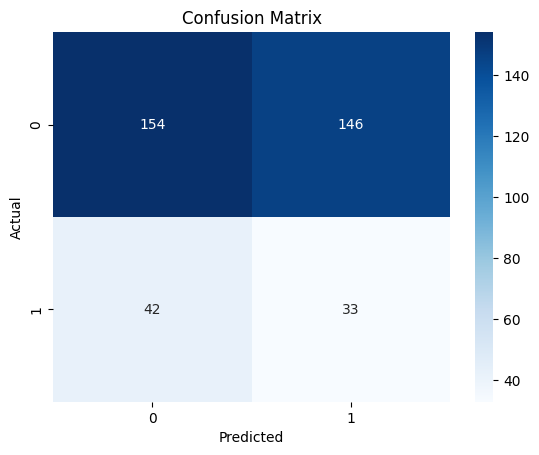

In [67]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
balanced_accuracy = balanced_accuracy_score(Y_test, Y_pred)
f2_score = fbeta_score(Y_test, Y_pred, beta = 0.5)
print('sensitivity', sensitivity)
print('specificity', specificity)
print('balanced_accuracy', balanced_accuracy)
print('f2_score', f2_score)
print('roc_auc_score', roc_auc_score(Y_test, Y_pred))
# print('brierscore', brier_score_loss(Y_test, Y_pred))
y_proba = model.predict_proba(X_test)[:, 1]
# print(y_proba)
roc_auc = roc_auc_score(Y_test, Y_pred)
brier_score = brier_score_loss(Y_test, y_proba)

metrics_df = pd.DataFrame({
    'Model' : 'Italy on Indian 375',
    'Sensitivity': [sensitivity],
    'Specificity': [specificity],
    'Accuracy' : [accuracy],
    'Balanced Accuracy': [balanced_accuracy],
    'F2 Score': [f2_score],
    'ROC AUC': [roc_auc],
    'Brier Score': [brier_score]
})

print('brierscore', brier_score_loss(Y_test, y_proba))
sns.heatmap(cm, annot = True, fmt = "d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")    
plt.show()

In [68]:
def computemetrics(y_true, y_proba):
    thresh = [0.15, 0.5]
    prop = np.mean(y_true == 1)  # prevalence
    auc = roc_auc_score(y_true, y_proba)
    for th in thresh:
        y_pred = (y_proba >= th).astype(int)
        tpr = recall_score(y_true, y_pred)  # sensitivity
        tnr = recall_score(y_true, y_pred, pos_label=0)  # specificity
        std_net_benefit = ((tpr * prop - (1 - tnr) * (1 - prop) * th / (1 - th)) / prop)
        bal_acc = balanced_accuracy_score(y_true, y_pred)
        print(
            f"Threshold - {th} Standardized Net Benefit - {round(std_net_benefit, 3)}",
            f"AUC Score - {round(auc, 3)}",
            f"Balanced Accuracy - {round(bal_acc, 3)}"
        )

computemetrics(Y_test, y_proba)

Threshold - 0.15 Standardized Net Benefit - 0.231 AUC Score - 0.517 Balanced Accuracy - 0.508
Threshold - 0.5 Standardized Net Benefit - -1.507 AUC Score - 0.517 Balanced Accuracy - 0.477


In [69]:
sim_score375 = avgKS(df2, dfItaly)

In [70]:
out1 = pd.DataFrame()
out1['y_true'] = Y_test.copy()
out1['y_proba'] = ((model.predict_proba(X_test))[:, 1])
out1.to_csv('../Results/2aIndiaItaly375.csv', index = False)

## Testing on Indian 600

In [71]:
df = pd.read_csv('../Data/smoteesimedc.csv')

In [72]:
df.drop(columns = [df.columns[0], 'Gender', 'Age'])

,Haemoglobin(gms%),Total WBC Count(/Cumm),Neutrophils(%),Lymphocytes(%),Eosinophils(%),Monocytes(%),Basophils(%),Total RBC Count(millions/Cu),HCT(%),MCV(f L),MCH(pg),MCHC(gms%),RDWCV(%),Platelet Count(Lakh / Cumm),Result
0,11.6,10200,72,23,2,3,0,4.20,35.00,84.00,28.30,33.70,14.40,2.20,0
1,13.7,7100,63,34,1,2,0,4.36,40.10,92.00,31.30,34.10,14.10,2.48,0
2,11.1,8500,59,35,3,3,0,4.00,33.50,84.00,27.90,33.30,14.00,2.68,0
3,14.0,5500,45,50,2,3,0,4.73,42.00,89.00,29.70,33.40,14.30,2.34,0
4,13.2,5100,61,33,3,3,0,3.27,42.20,80.00,25.10,31.40,15.40,1.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,12.9,12577,84,12,0,2,0,4.38,37.64,84.69,29.01,34.30,14.69,1.11,1
596,9.9,16759,90,6,0,2,0,3.79,30.04,78.92,25.93,32.89,17.51,4.53,1
597,10.5,14470,77,12,1,7,0,3.57,32.81,89.67,28.80,32.10,13.55,4.04,1
598,11.4,17961,78,18,0,1,0,3.72,33.82,91.13,30.10,33.13,13.75,2.48,1


In [73]:
df2 = df[order]
cols = df2.columns.tolist()
cols.remove('Result')
for c in cols:
    df2[c] = ((df2[c] - (df2[c].mean())))/(df2[c].std())

X_test = df2.drop(columns = ['Result'])
Y_test = df2['Result']

X_test
X = dfItaly.drop(columns = ['Result'])
Y = dfItaly['Result']

df2

,Total WBC Count(/Cumm),Haemoglobin(gms%),HCT(%),MCV(f L),MCH(pg),MCHC(gms%),Platelet Count(Lakh / Cumm),Lymphocytes(%),Monocytes(%),Eosinophils(%),Basophils(%),Result
0,0.232943,-0.504099,-0.506283,0.000298,0.074266,0.213477,-0.369887,-0.179127,-0.242034,0.170456,-0.040825,0
1,-0.536994,0.444900,0.360824,1.067662,1.032127,0.410464,-0.075519,0.675709,-0.813769,-0.356728,-0.040825,0
2,-0.189281,-0.730052,-0.761314,0.000298,-0.053449,0.016489,0.134743,0.753421,-0.242034,0.697640,-0.040825,0
3,-0.934382,0.580471,0.683864,0.667400,0.521268,0.065736,-0.222703,1.919106,-0.242034,0.170456,-0.040825,0
4,-1.033729,0.218948,0.717868,-0.533384,-0.947452,-0.919199,-0.643228,0.597996,-0.242034,0.697640,-0.040825,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.823312,0.083376,-0.057427,0.092358,0.300960,0.508957,-1.515818,-1.033963,-0.813769,-0.883912,-0.040825,1
596,1.861983,-1.272337,-1.349586,-0.677478,-0.682444,-0.185422,2.079672,-1.500237,-0.813769,-0.883912,-0.040825,1
597,1.293471,-1.001194,-0.878628,0.756792,0.233910,-0.574472,1.564528,-1.033963,2.044905,-0.356728,-0.040825,1
598,2.160520,-0.594480,-0.706907,0.951586,0.648982,-0.067230,-0.075519,-0.567689,-1.385504,-0.883912,-0.040825,1


In [74]:
X 

,Total WBC Count(/Cumm),Haemoglobin(gms%),HCT(%),MCV(f L),MCH(pg),MCHC(gms%),Platelet Count(Lakh / Cumm),Lymphocytes(%),Monocytes(%),Eosinophils(%),Basophils(%)
0,0.276856,0.034744,-0.143897,1.950285,2.031963,0.720550,-0.357794,-0.470825,0.429497,1.245906,0.591746
1,0.129722,0.838773,0.601112,-0.770177,-0.243222,1.055218,1.068793,NaN,NaN,NaN,NaN
2,-0.395755,0.424576,0.361645,-0.438237,-0.224572,0.385882,-0.363020,-0.670739,-0.137165,-0.359497,-0.883555
3,0.234818,0.643857,0.530159,-0.394941,-0.094029,0.608994,-0.263734,1.628280,0.429497,0.504951,2.067046
4,-1.593844,-1.922540,-1.899991,1.601508,0.937885,-0.878421,-1.874959,2.309807,0.558283,4.703700,0.591746
...,...,...,...,...,...,...,...,...,...,...,...
1383,0.519777,-1.917899,-1.958274,0.081320,-0.189939,-0.570313,0.305856,-0.531837,0.124088,1.625205,-0.040526
1384,-0.582825,-1.597680,-1.758084,-0.337212,-0.243222,0.162770,0.483527,0.028962,-0.162923,0.813682,-0.514730
1385,-0.442698,0.984961,0.873100,1.351351,1.472491,0.658574,-0.324699,0.510575,0.558283,1.842787,1.452338
1386,0.550104,1.862084,1.966963,1.336918,1.248703,0.162770,-0.049484,-0.452650,0.017379,0.134473,0.222920


Accuracy: 0.5433333333333333
              precision    recall  f1-score   support

           0       0.54      0.57      0.56       300
           1       0.55      0.52      0.53       300

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600

sensitivity 0.5166666666666667
specificity 0.57
balanced_accuracy 0.5433333333333333
f2_score 0.5396935933147633
roc_auc_score 0.5433333333333333


,Model,Sensitivity,Specificity,Accuracy,Balanced Accuracy,F2 Score,ROC AUC,Brier Score
0,Italy on Indian 375,0.440000,0.513333,0.498667,0.476667,0.208597,0.476667,0.363717
1,Italy on Indian 600,0.516667,0.570000,0.543333,0.543333,0.539694,0.543333,0.334481


brierscore 0.3344809385452984


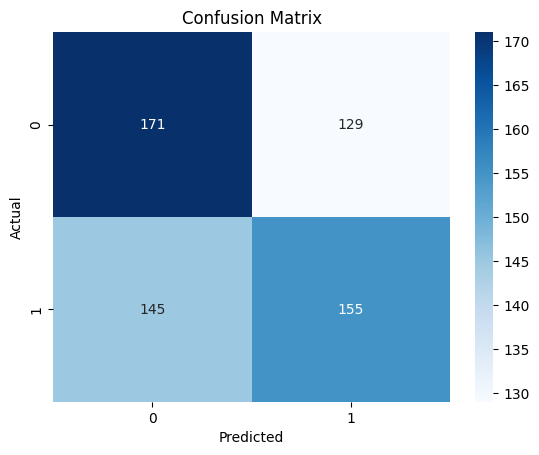

In [75]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
balanced_accuracy = balanced_accuracy_score(Y_test, Y_pred)
f2_score = fbeta_score(Y_test, Y_pred, beta = 0.5)
print('sensitivity', sensitivity)
print('specificity', specificity)
print('balanced_accuracy', balanced_accuracy)
print('f2_score', f2_score)
print('roc_auc_score', roc_auc_score(Y_test, Y_pred))
# print('brierscore', brier_score_loss(Y_test, Y_pred))
y_proba = model.predict_proba(X_test)[:, 1]
# print(y_proba)

roc_auc = roc_auc_score(Y_test, Y_pred)
brier_score = brier_score_loss(Y_test, y_proba)

new_metrics = {
    'Model' : 'Italy on Indian 600',
    'Sensitivity': sensitivity,  # Example value
    'Specificity': specificity,  # Example value
    'Accuracy' : accuracy,
    'Balanced Accuracy': balanced_accuracy,  # Example value
    'F2 Score': f2_score,  # Example value
    'ROC AUC': roc_auc,  # Example value
    'Brier Score': brier_score # Example value
}

metrics_df.loc[len(metrics_df)] = new_metrics
display(metrics_df)


print('brierscore', brier_score_loss(Y_test, y_proba))
sns.heatmap(cm, annot = True, fmt = "d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")    
plt.show()

In [76]:
computemetrics(Y_test, y_proba)

Threshold - 0.15 Standardized Net Benefit - 0.641 AUC Score - 0.579 Balanced Accuracy - 0.535
Threshold - 0.5 Standardized Net Benefit - 0.087 AUC Score - 0.579 Balanced Accuracy - 0.543


In [77]:
sim_score600 = avgKS(df2, dfItaly)

In [78]:
dtest = pd.DataFrame([sim_score375, sim_score600])
dtest

,0
0,0.369817
1,0.382058


In [79]:
out2 = pd.DataFrame()
out2['y_true'] = Y_test.copy()
out2['y_proba'] = ((model.predict_proba(X_test))[:, 1])
out2.to_csv('../Results/2bIndiaItaly600.csv', index = False)

## Testing on Brazil


In [80]:
dfBrazil = pd.read_csv('../Data/3-fourteen-feature.csv')

In [81]:
dfBrazil = dfBrazil.rename(columns = {'Hematocrit' : 'HCT(%)', 
                                      'Hemoglobin' : 'Haemoglobin(gms%)',
                                      'Platelets' : 'Platelet Count(Lakh / Cumm)',
                                      'Erythrocytes' : 'Total RBC Count(millions/Cu)',
                                      'Lymphocytes' : 'Lymphocytes(%)',
                                      'MCHC' : 'MCHC(gms%)',
                                      'Leukocytes' : 'Total WBC Count(/Cumm)',
                                      'Basophils' : 'Basophils(%)',
                                      'MCH' : 'MCH(pg)',
                                      'Eosinophils' : 'Eosinophils(%)',
                                      'MCV' : 'MCV(f L)',
                                      'Monocytes' : 'Monocytes(%)',
                                      'RDW' : 'RDWCV(%)',
                                      'CoV-2' : 'Result'})

In [82]:
dfBrazil

,HCT(%),Haemoglobin(gms%),Platelet Count(Lakh / Cumm),MPV,Total RBC Count(millions/Cu),Lymphocytes(%),MCHC(gms%),Total WBC Count(/Cumm),Basophils(%),MCH(pg),Eosinophils(%),MCV(f L),Monocytes(%),RDWCV(%),Result,Probability
0,-2.085973,-2.032676,-1.235475,2.317897,-2.145106,-0.328111,-0.418941,-0.038206,1.005582,0.625119,-0.558567,0.904244,-0.640155,2.080230,0.0,0.428487
1,-1.274456,-1.352212,2.319303,0.095416,-1.278015,-0.334471,-0.854400,0.794473,-0.576866,-0.092740,-0.114376,0.315128,0.116525,0.530675,1.0,0.911545
2,-0.304165,-0.137099,0.819447,-0.222081,-0.369634,-0.073713,0.713251,-0.135622,0.028762,0.529404,-0.353556,0.172312,0.543436,0.316943,0.0,0.173168
3,-1.045115,-1.011980,2.094915,0.412913,-1.112855,-0.244275,-0.157666,1.427680,-0.576866,0.337975,-0.558567,0.440092,0.535767,0.851272,0.0,0.662734
4,-0.621715,-0.623144,1.716999,0.518746,-0.741245,0.039610,-0.157666,2.158303,-0.576866,0.290118,0.109617,0.422240,1.916198,0.958138,0.0,0.112475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11911,0.789617,0.591970,-0.196204,-0.857075,0.249717,0.844434,-0.593125,0.439599,0.419490,0.625119,0.291849,1.029209,0.142089,-0.377685,0.0,0.032045
11912,0.383859,0.397552,-0.373353,-1.174573,0.222190,-0.540881,0.190701,0.425682,0.419490,0.290118,-0.137155,0.225868,0.234118,-0.965447,0.0,0.045957
11913,0.260368,0.446156,-0.326113,0.095416,0.139610,-0.184145,0.887434,-0.379163,0.458563,0.577261,0.121007,0.154460,-0.098208,-0.484551,1.0,0.468455
11914,0.172159,0.591970,-1.070137,1.047908,-0.576084,-0.152345,1.932534,1.796470,-0.576866,2.778695,-0.558567,1.921809,-0.448429,-0.751715,0.0,0.008298


In [83]:
#Drop MPV, Probability, Cov-2
# dfBrazil = dfBrazil.drop(columns = ['MPV', 'Probability'])
# order.remove('Neutrophils(%)')
dfBrazil = dfBrazil[order]

In [84]:
# dfBrazil = dfBrazil.rename(columns = {'Hematocrit' : 'HCT(%)', 
#                                       'Hemoglobin' : 'Haemoglobin(gms%)',
#                                       'Platelets' : 'Platelet Count(Lakh / Cumm)',
#                                       'Erythrocytes' : 'Total RBC Count(millions/Cu)',
#                                       'Lymphocytes' : 'Lymphocytes(%)',
#                                       'MCHC' : 'MCHC(gms%)',
#                                       'Leukocytes' : 'Total WBC Count(/Cumm)',
#                                       'Basophils' : 'Basophils(%)',
#                                       'MCH' : 'MCH(pg)',
#                                       'Eosinophils' : 'Eosinophils(%)',
#                                       'MCV' : 'MCV(f L)',
#                                       'Monocytes' : 'Monocytes(%)',
#                                       'RDW' : 'RDWCV(%)',
#                                       'CoV-2' : 'Result'})

In [85]:
dfBrazil.columns

Index(['Total WBC Count(/Cumm)', 'Haemoglobin(gms%)', 'HCT(%)', 'MCV(f L)',
       'MCH(pg)', 'MCHC(gms%)', 'Platelet Count(Lakh / Cumm)',
       'Lymphocytes(%)', 'Monocytes(%)', 'Eosinophils(%)', 'Basophils(%)',
       'Result'],
      dtype='object')

In [86]:
X_test = dfBrazil.drop(columns = ['Result'])
Y_test = dfBrazil['Result']

In [87]:
X_test

,Total WBC Count(/Cumm),Haemoglobin(gms%),HCT(%),MCV(f L),MCH(pg),MCHC(gms%),Platelet Count(Lakh / Cumm),Lymphocytes(%),Monocytes(%),Eosinophils(%),Basophils(%)
0,-0.038206,-2.032676,-2.085973,0.904244,0.625119,-0.418941,-1.235475,-0.328111,-0.640155,-0.558567,1.005582
1,0.794473,-1.352212,-1.274456,0.315128,-0.092740,-0.854400,2.319303,-0.334471,0.116525,-0.114376,-0.576866
2,-0.135622,-0.137099,-0.304165,0.172312,0.529404,0.713251,0.819447,-0.073713,0.543436,-0.353556,0.028762
3,1.427680,-1.011980,-1.045115,0.440092,0.337975,-0.157666,2.094915,-0.244275,0.535767,-0.558567,-0.576866
4,2.158303,-0.623144,-0.621715,0.422240,0.290118,-0.157666,1.716999,0.039610,1.916198,0.109617,-0.576866
...,...,...,...,...,...,...,...,...,...,...,...
11911,0.439599,0.591970,0.789617,1.029209,0.625119,-0.593125,-0.196204,0.844434,0.142089,0.291849,0.419490
11912,0.425682,0.397552,0.383859,0.225868,0.290118,0.190701,-0.373353,-0.540881,0.234118,-0.137155,0.419490
11913,-0.379163,0.446156,0.260368,0.154460,0.577261,0.887434,-0.326113,-0.184145,-0.098208,0.121007,0.458563
11914,1.796470,0.591970,0.172159,1.921809,2.778695,1.932534,-1.070137,-0.152345,-0.448429,-0.558567,-0.576866


Accuracy: 0.6489593823430682
              precision    recall  f1-score   support

         0.0       0.86      0.62      0.72      8771
         1.0       0.41      0.73      0.52      3145

    accuracy                           0.65     11916
   macro avg       0.64      0.67      0.62     11916
weighted avg       0.74      0.65      0.67     11916

sensitivity 0.7271860095389507
specificity 0.6209098164405427
balanced_accuracy 0.6740479129897468
f2_score 0.44680185988356186
roc_auc_score 0.6740479129897468


,Model,Sensitivity,Specificity,Accuracy,Balanced Accuracy,F2 Score,ROC AUC,Brier Score
0,Italy on Indian 375,0.440000,0.513333,0.498667,0.476667,0.208597,0.476667,0.363717
1,Italy on Indian 600,0.516667,0.570000,0.543333,0.543333,0.539694,0.543333,0.334481
2,Italy on Brazil,0.727186,0.620910,0.648959,0.674048,0.446802,0.543333,0.334481


brierscore 0.274688490568286


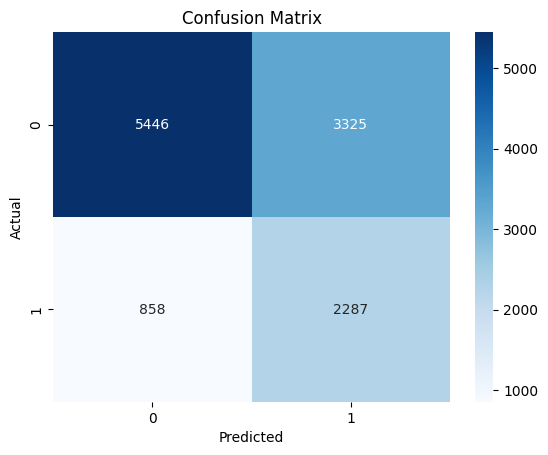

In [88]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
balanced_accuracy = balanced_accuracy_score(Y_test, Y_pred)
f2_score = fbeta_score(Y_test, Y_pred, beta = 0.5)
print('sensitivity', sensitivity)
print('specificity', specificity)
print('balanced_accuracy', balanced_accuracy)
print('f2_score', f2_score)
print('roc_auc_score', roc_auc_score(Y_test, Y_pred))
# print('brierscore', brier_score_loss(Y_test, Y_pred))
y_proba = model.predict_proba(X_test)[:, 1]
# print(y_proba)

new_metrics = {
    'Model' : 'Italy on Brazil',
    'Sensitivity': sensitivity,  
    'Specificity': specificity,  
    'Accuracy' : accuracy,
    'Balanced Accuracy': balanced_accuracy,  
    'F2 Score': f2_score,  
    'ROC AUC': roc_auc,  
    'Brier Score': brier_score 
}

metrics_df.loc[len(metrics_df)] = new_metrics
display(metrics_df)

print('brierscore', brier_score_loss(Y_test, y_proba))
sns.heatmap(cm, annot = True, fmt = "d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")    
plt.show()

In [89]:
computemetrics(Y_test, y_proba)

Threshold - 0.15 Standardized Net Benefit - 0.562 AUC Score - 0.731 Balanced Accuracy - 0.633
Threshold - 0.5 Standardized Net Benefit - -0.33 AUC Score - 0.731 Balanced Accuracy - 0.674


In [90]:
metrics_df.to_csv('../Results/Italy_metrics.csv', index = False)

In [91]:
sim_scoreItalyB = avgKS(X_test, dfItaly)

In [92]:
out3 = pd.DataFrame()
out3['y_true'] = Y_test.copy()
out3['y_proba'] = ((model.predict_proba(X_test))[:, 1])
out3.to_csv('../Results/2cBrazilItaly.csv', index = False)

## For EPD

In [93]:
df_similarity_Italy= pd.DataFrame([sim_score375, sim_score600, sim_scoreItalyB])

In [94]:
df_similarity_Italy.to_csv('../Results/SimilarityItaly.csv', index = False)